<h1>Analyzing the dataset we created to extract relevant information

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('mitbih_beats.csv')
data.head()

,samp_0,samp_1,samp_2,samp_3,samp_4,samp_5,samp_6,samp_7,samp_8,samp_9,...,samp_83,samp_84,samp_85,samp_86,samp_87,samp_88,samp_89,samp_90,rr_interval,label
0,0.200,0.200,0.180,0.200,0.205,0.190,0.145,0.115,0.095,0.075,...,-0.055,-0.055,-0.075,-0.070,-0.075,-0.08,-0.070,-0.085,777.777778,N
1,0.055,0.065,0.090,0.090,0.065,0.045,0.050,0.030,0.030,-0.010,...,-0.155,-0.150,-0.135,-0.120,-0.120,-0.13,-0.145,-0.130,791.666667,N
2,-0.040,-0.005,0.055,0.110,0.140,0.155,0.160,0.150,0.170,0.160,...,-0.125,-0.120,-0.100,-0.090,-0.095,-0.11,-0.105,-0.120,683.333333,N
3,0.180,0.195,0.180,0.145,0.140,0.120,0.115,0.100,0.075,0.055,...,-0.050,-0.045,-0.055,-0.055,-0.065,-0.06,-0.050,-0.040,836.111111,N
4,0.115,0.085,0.060,0.040,0.040,0.035,0.015,-0.005,-0.025,-0.045,...,-0.060,-0.070,-0.080,-0.090,-0.070,-0.06,-0.045,-0.065,802.777778,N


In [6]:
len(data) # number of individual beats

106710

### We can clearly see a disproportianate amount of (N)ormal beats in the dataset which is not good for training
_We will need to appropriately preprocess the data._

In [7]:
data['label'].value_counts(normalize=True) * 100 # Percentage of each label's occurance in the dataset

label
N    68.759254
L     7.526942
V     6.503608
/     6.457689
R     6.387405
A     2.244401
f     0.898697
F     0.745010
j     0.212726
a     0.137757
J     0.077781
Q     0.030925
e     0.014994
S     0.001874
E     0.000937
Name: proportion, dtype: float64

### A single beat from the dataset, filtered and visualized

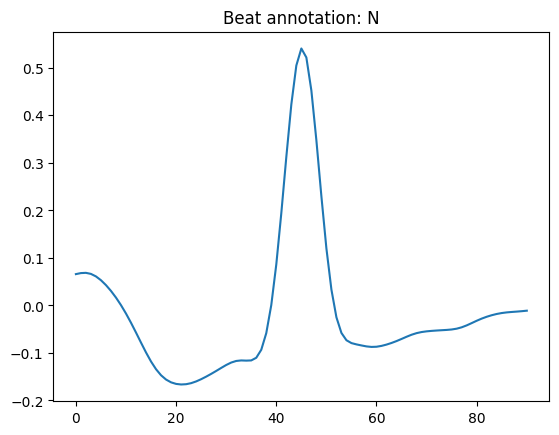

In [11]:
import modules.preprocessor as pre

sample_row = data.iloc[500].to_list()
sample_beat = sample_row[:-2] # Last 2 elements are the R-R interval and label respectively
sample_beat = pre.filter_ecg(sample_beat, 360)
beat_annotation = sample_row[-1]

plt.title(f'Beat annotation: {beat_annotation}')
plt.plot(sample_beat)
plt.show()

### A look at the R-R intervals

In [ ]:
# Lines up with average R-R intervals from medical sources (600-1200 milliseconds)
# https://emedicine.medscape.com/article/2172196-overview?form=fpf

data['rr_interval'].mean()

np.float64(790.5083351555098)

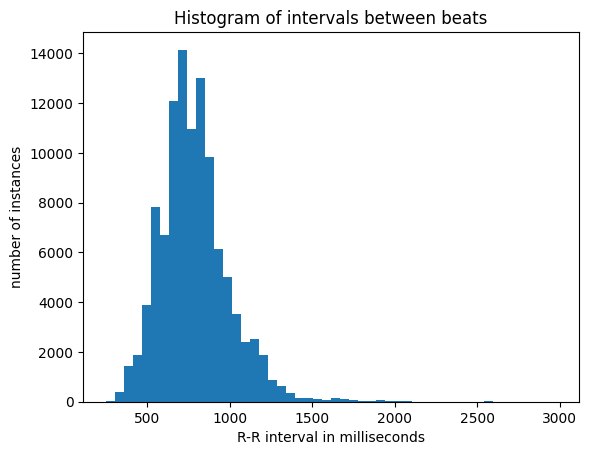

In [ ]:
# A rough normal distribution around the mean ~800 ms with some outliers (all the way to 10,000 ms)

rr_intervals = [x for x in data['rr_interval'].to_list() if x < 3000]
plt.title("Histogram of intervals between beats")
plt.hist(rr_intervals, bins=50)
plt.xlabel("R-R interval in milliseconds")
plt.ylabel("number of instances")
plt.show()